In [5]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('inn.csv')
dropped = ['Unnamed: 0']
location = 52
df.drop(dropped,inplace=True,axis=1)
df = df[df['cod_location'] == location]
df.set_index('date', inplace=True)

Text(0, 0.5, 'New Cases')

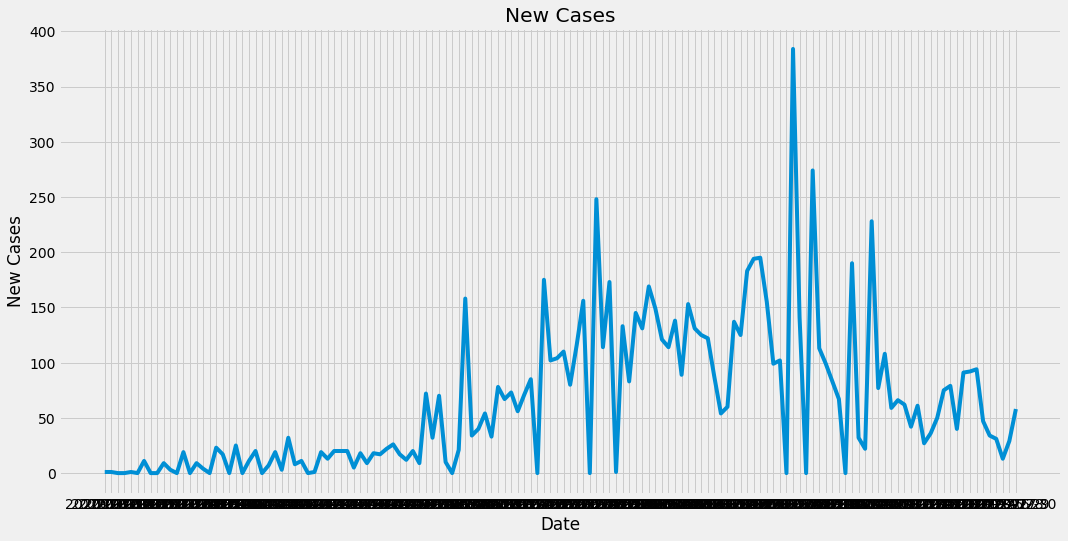

In [7]:
plt.figure(figsize=(16,8))
plt.title('New Cases')
plt.plot(df['new_cases'])
plt.xlabel('Date')
plt.ylabel('New Cases')

In [8]:
data = df.filter(['new_cases'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len 
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
#Dataset de Treino
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00260417, 0.00260417, 0.        , 0.        , 0.00260417,
       0.        , 0.02864583, 0.        , 0.        , 0.0234375 ,
       0.0078125 , 0.        , 0.04947917, 0.        , 0.0234375 ,
       0.01041667, 0.        , 0.05989583, 0.04427083, 0.        ,
       0.06510417, 0.        , 0.02864583, 0.05208333, 0.        ,
       0.01822917, 0.04947917, 0.0078125 , 0.08333333, 0.02083333,
       0.02864583, 0.        , 0.00260417, 0.04947917, 0.03385417,
       0.05208333, 0.05208333, 0.05208333, 0.01302083, 0.046875  ,
       0.0234375 , 0.046875  , 0.04427083, 0.05729167, 0.06770833,
       0.04427083, 0.03125   , 0.05208333, 0.0234375 , 0.1875    ,
       0.08333333, 0.18229167, 0.02604167, 0.        , 0.0546875 ,
       0.41145833, 0.08854167, 0.10416667, 0.140625  , 0.0859375 ])]
[0.203125]



In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(52, 60, 1)

In [12]:
#Criando modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Treino
model.fit(x_train,y_train,batch_size=1,epochs=1)

52/52 [==============================] - 1s 18ms/step - loss: 0.0539


In [14]:
#Criar Dataset "Test"
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

In [11]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid.shape

(28, 1)

In [12]:
new_df = df.filter(['new_cases'])
last = new_df[-60:].values
last_scaled = scaler.transform(last)
X_test = []
X_test.append(last_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_cases = model.predict(X_test)
pred_cases = scaler.inverse_transform(pred_cases)
pred_cases

array([[133.3345  , 114.42906 , 126.588066, 125.07799 , 127.397575,
        114.31137 , 128.81888 , 113.82118 , 124.48547 , 133.4467  ,
        108.07085 , 131.60818 , 115.1147  , 120.89215 , 118.368004,
        119.901886, 123.88996 , 112.58617 , 127.04162 , 126.40789 ,
        121.98713 , 127.673004, 118.71388 , 113.2509  , 122.04797 ]],
      dtype=float32)

In [15]:
#df1 = pred_cases.reshape(25,1)

date_id = range(0,25)

pred_cases = pred_cases.reshape(25,1)

cod_location = [52] *25

list_of_tuples = list(zip(date_id, pred_cases, cod_location))  


# Assign data to tuples.  
list_of_tuples   

df1 = pd.DataFrame(list_of_tuples, columns =['date_id', 'pred_cases', 'cd_location']) 
df1.set_index('date_id', inplace=True)

NameError: name 'pred_cases' is not defined

In [26]:
df1

,pred_cases,cd_location
date_id,,
0,[133.3345],52
1,[114.42906],52
2,[126.588066],52
3,[125.07799],52
4,[127.397575],52
5,[114.31137],52
6,[128.81888],52
7,[113.82118],52
8,[124.48547],52


In [27]:
#Saida em .csv
df1.to_csv('predictions.csv')